In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1006,2020-07-16,United Kingdom,292392.0,291911.0,45040.0,45053.0,481.0,-13.0
1007,2020-07-16,Germany,199844.0,200260.0,9080.0,9078.0,-416.0,2.0
1008,2020-07-16,Iran,265470.0,264561.0,13389.0,13410.0,909.0,-21.0
1009,2020-07-16,Turkey,215955.0,215940.0,5420.0,5419.0,15.0,1.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2974.4302670623147
RMSE =  7452.995183132898


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  297.84371909000987
RMSE =  692.6854363625408


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  15302.57142857143
RMSE =  20064.146844863473
-- World performances for deaths --
MAE =  1544.061224489796
RMSE =  1883.1532338184315


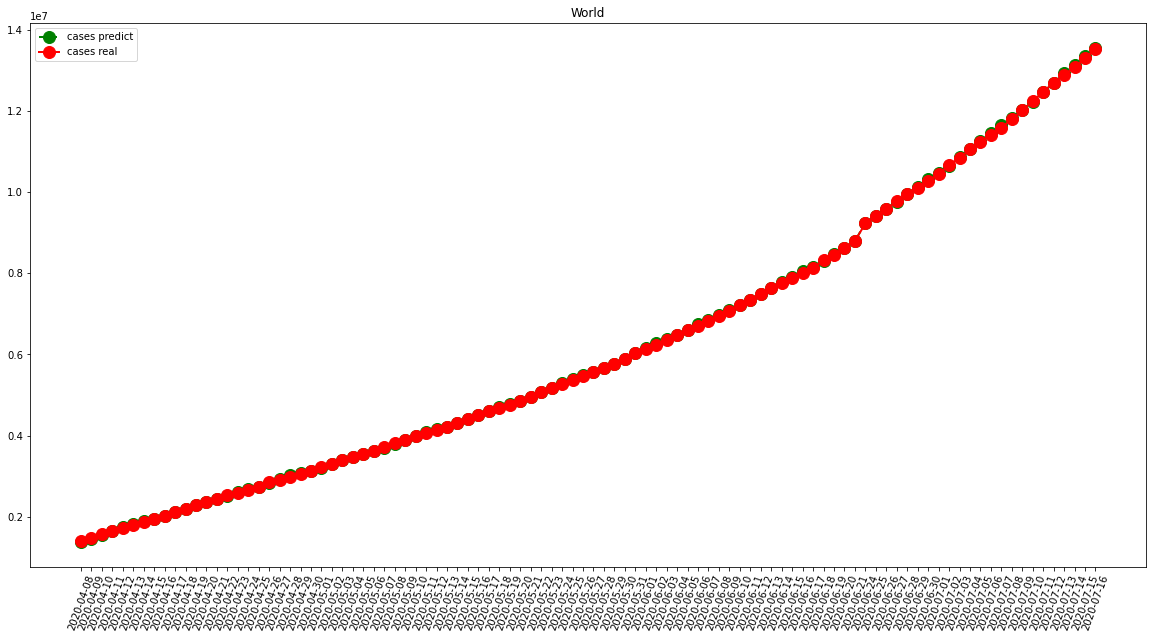

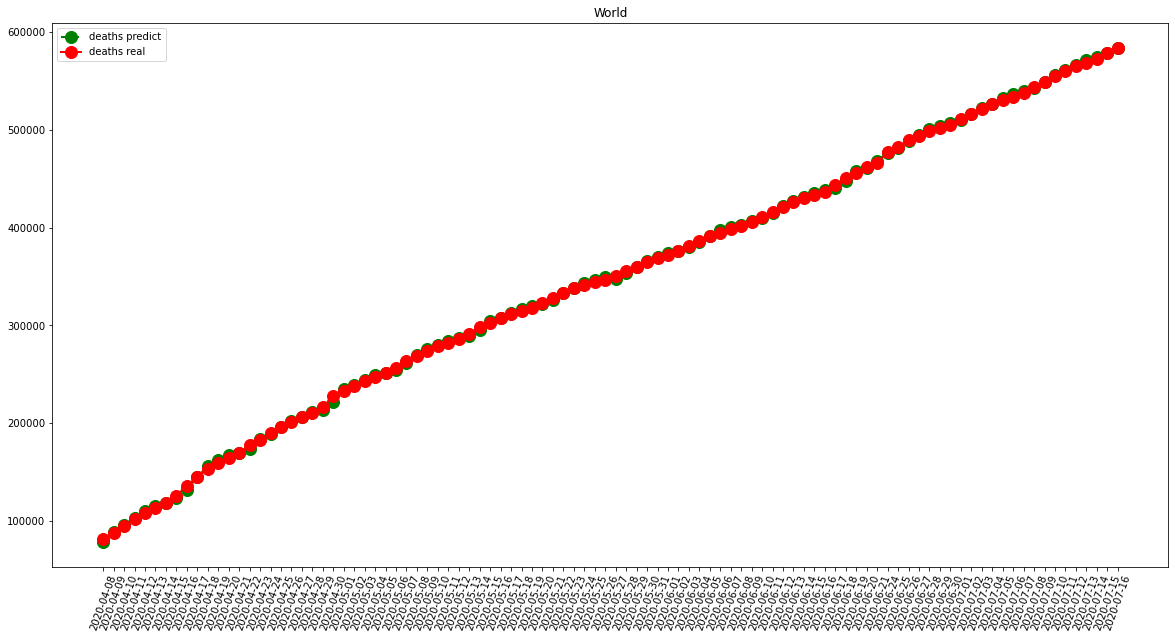

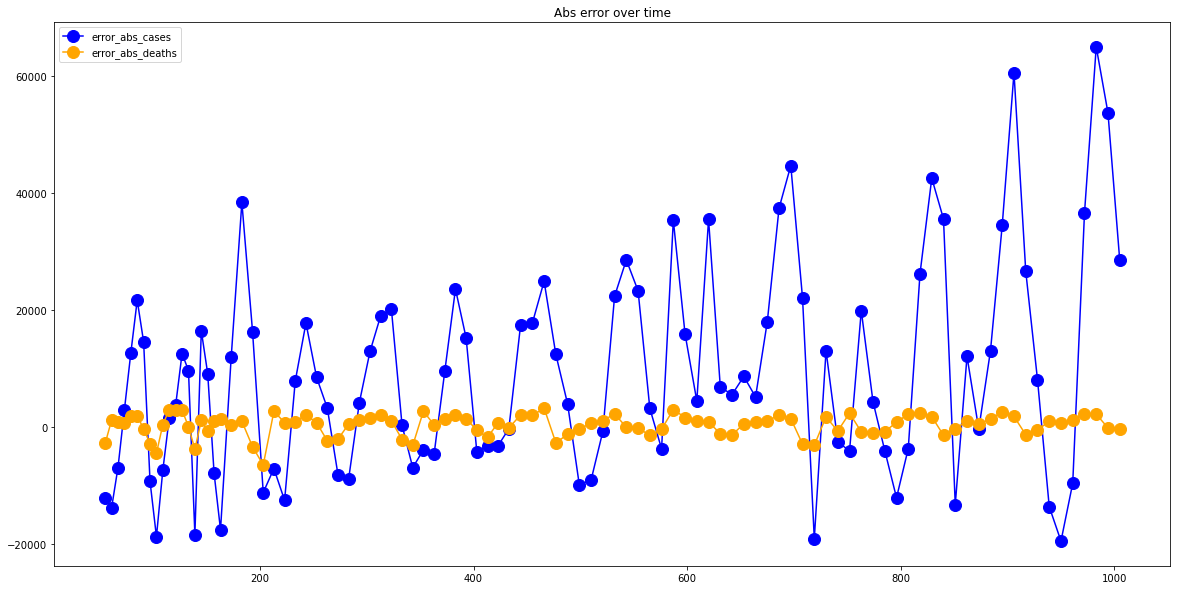

In [7]:
visShow("World")

-- France performances for cases --
MAE =  852.1296296296297
RMSE =  1405.9892655403935
-- France performances for deaths --
MAE =  164.89814814814815
RMSE =  322.39533185206017


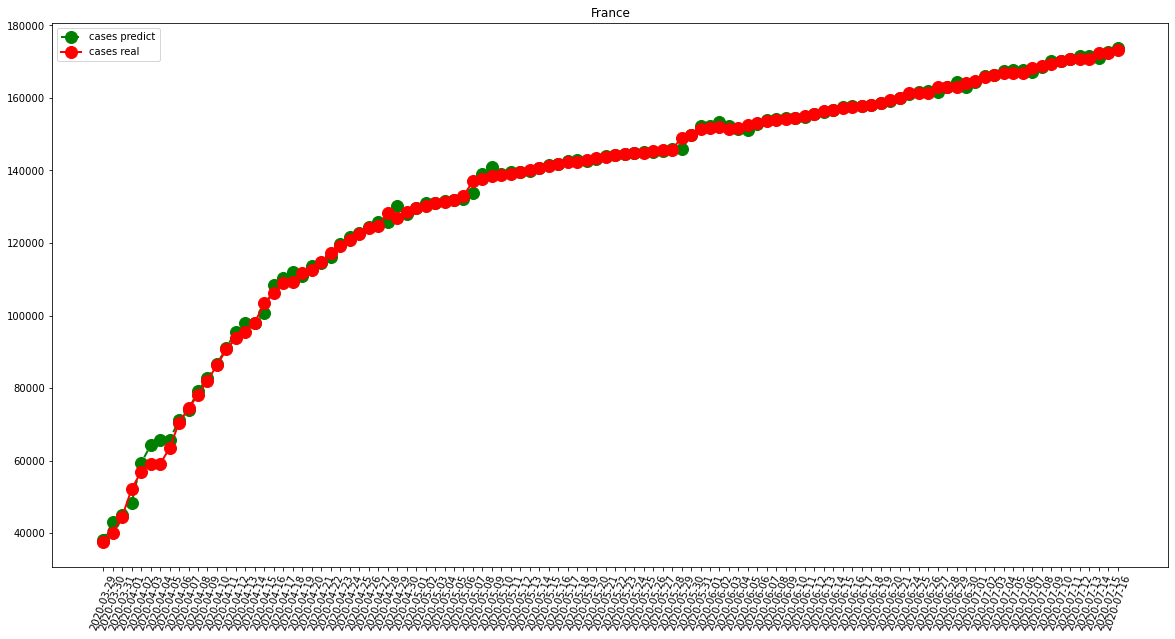

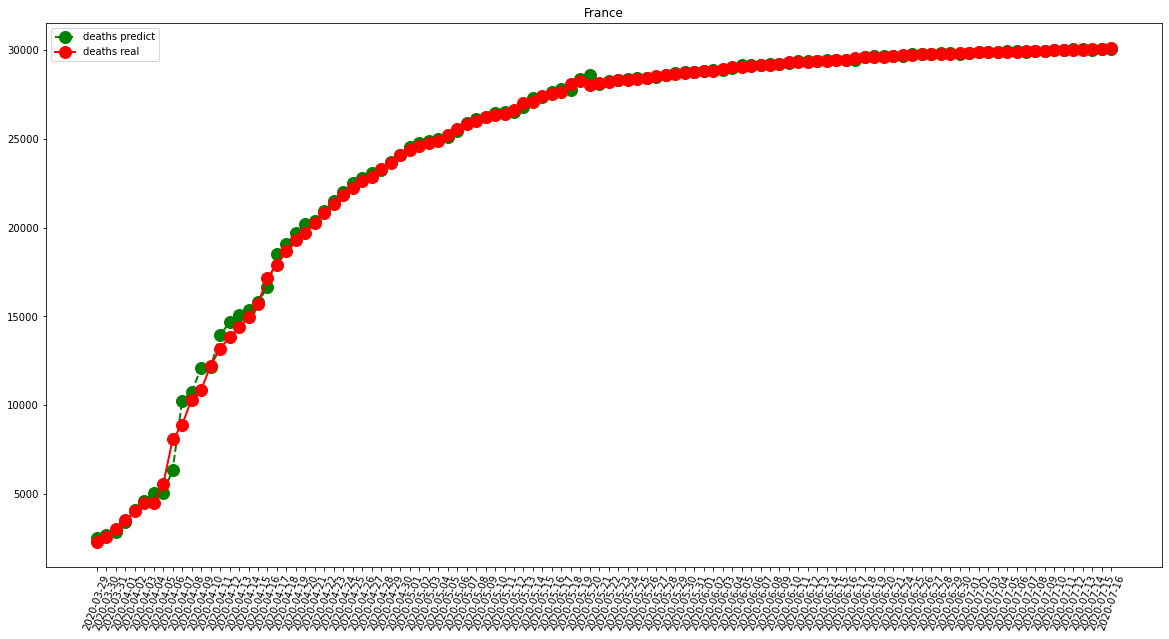

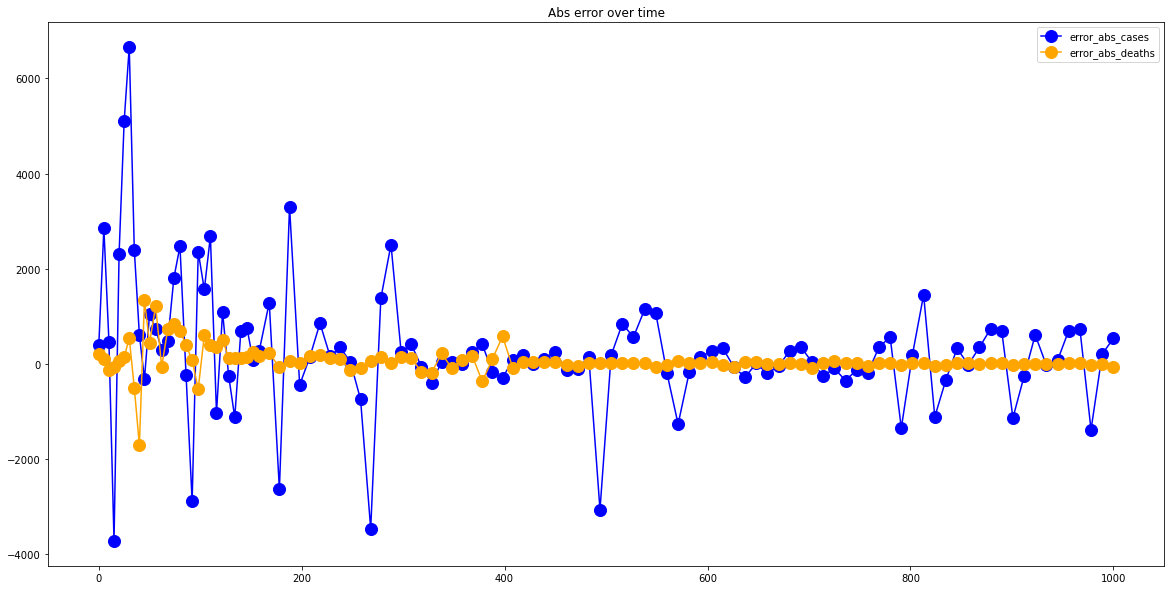

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  355.0
RMSE =  523.6248834027261
-- Italy performances for deaths --
MAE =  92.05555555555556
RMSE =  284.65248468446055


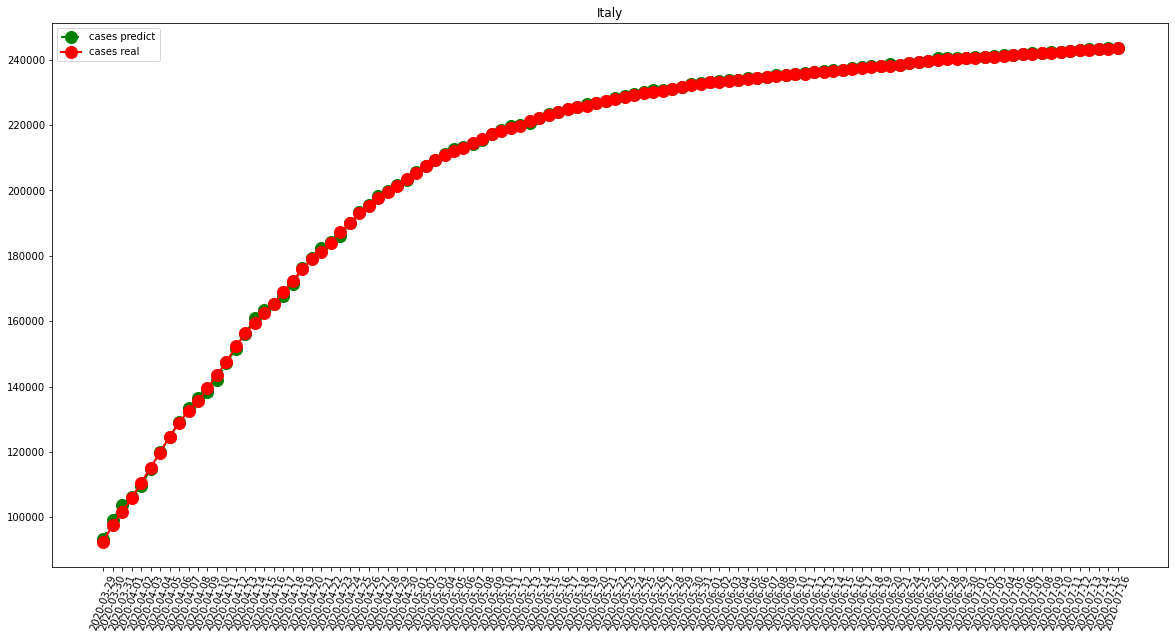

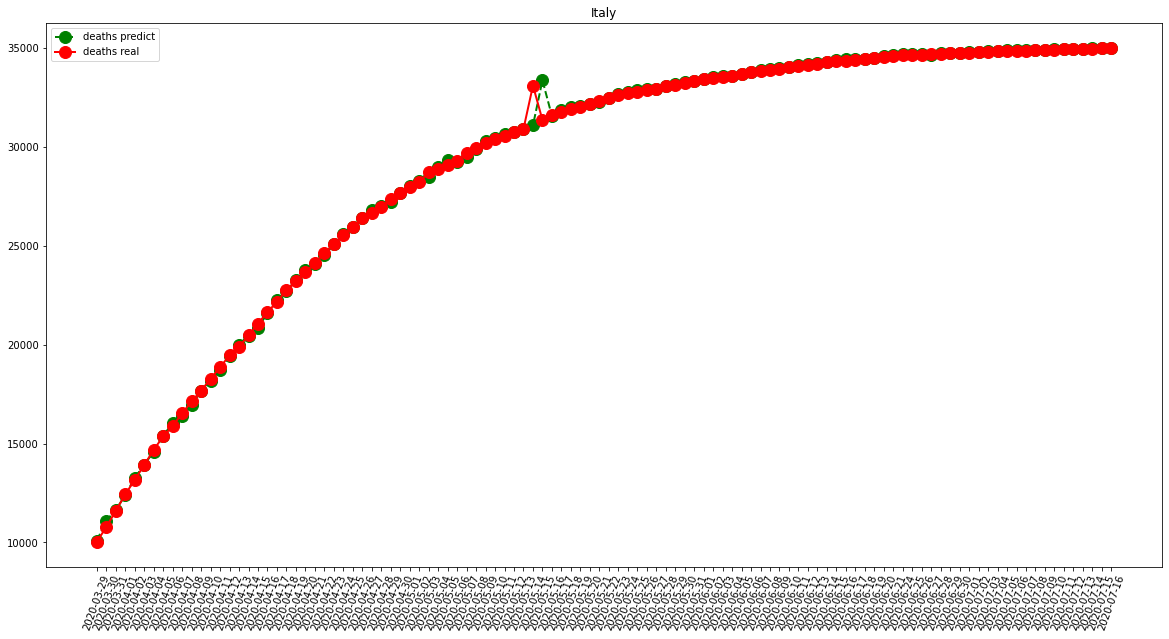

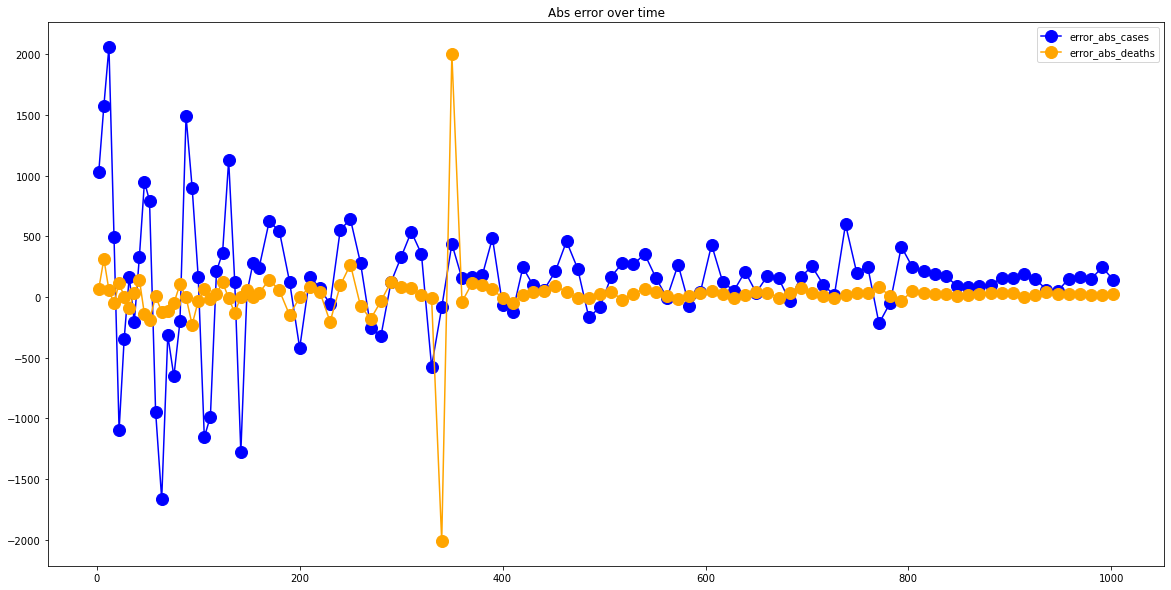

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  848.4814814814815
RMSE =  1987.5309501433626
-- Spain performances for deaths --
MAE =  168.92592592592592
RMSE =  390.5775637864179


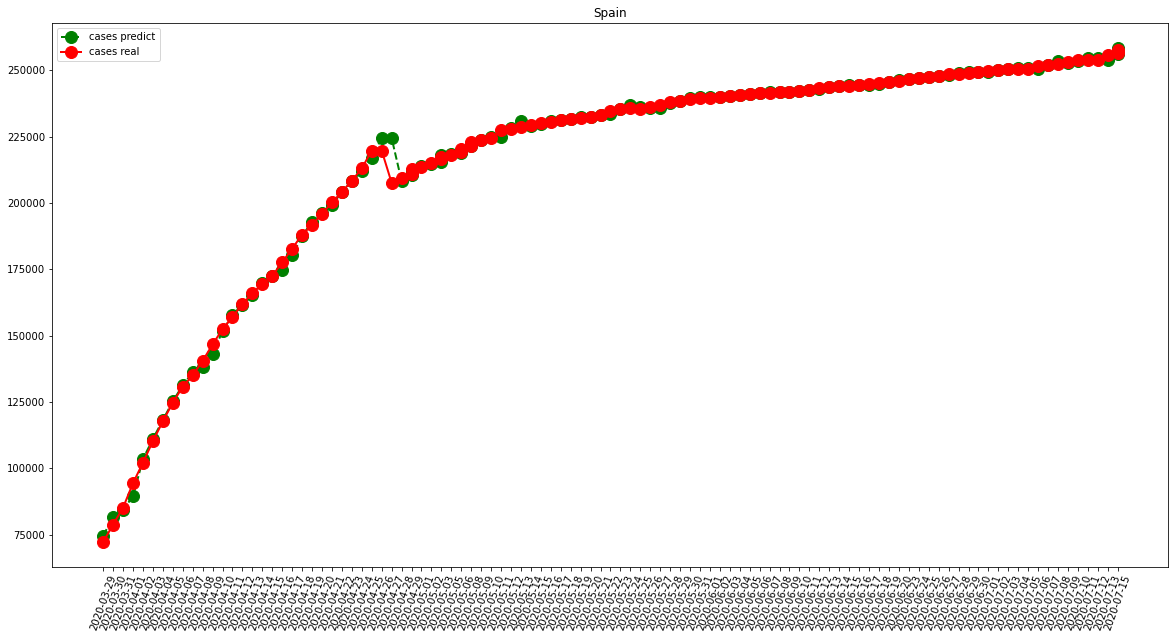

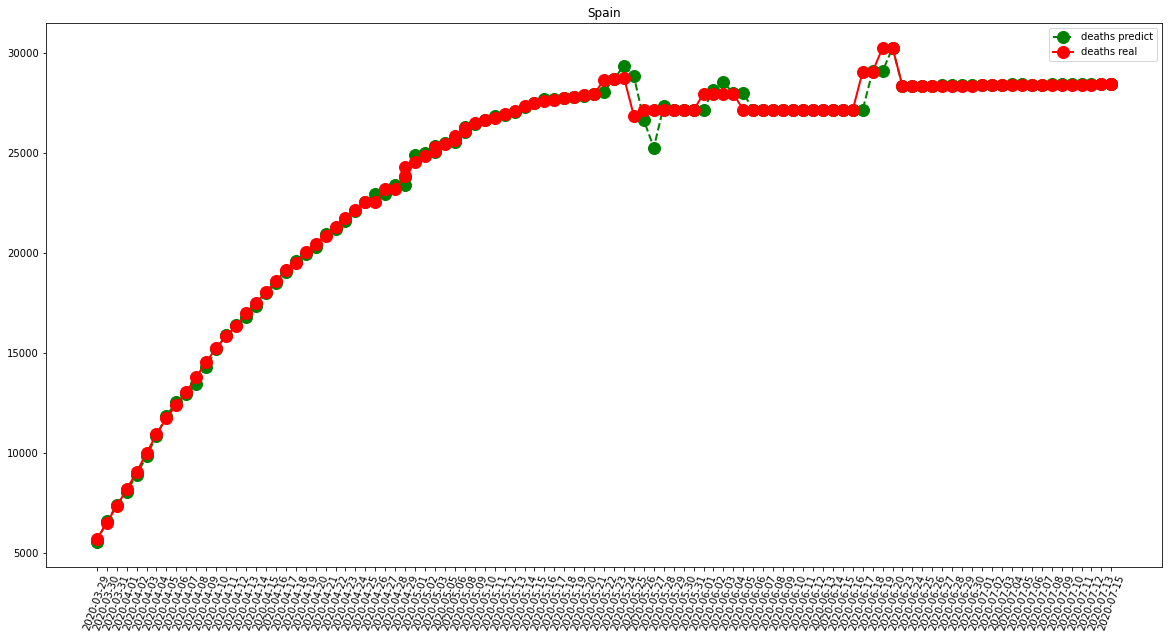

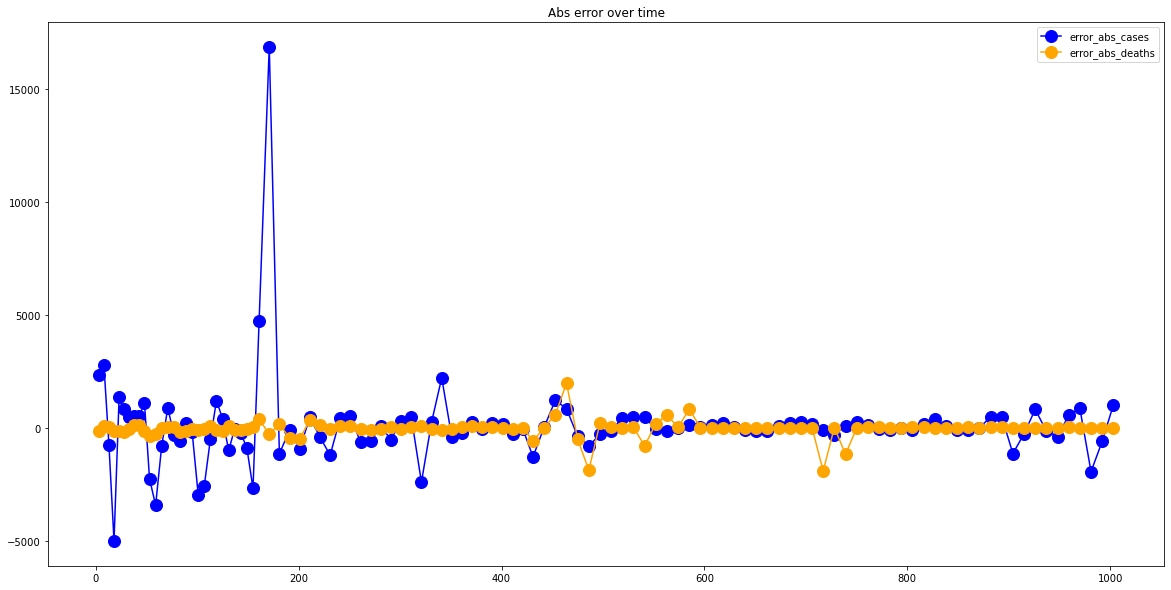

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  5331.259259259259
RMSE =  7229.009538478104
-- United States performances for deaths --
MAE =  522.0
RMSE =  758.522101047674


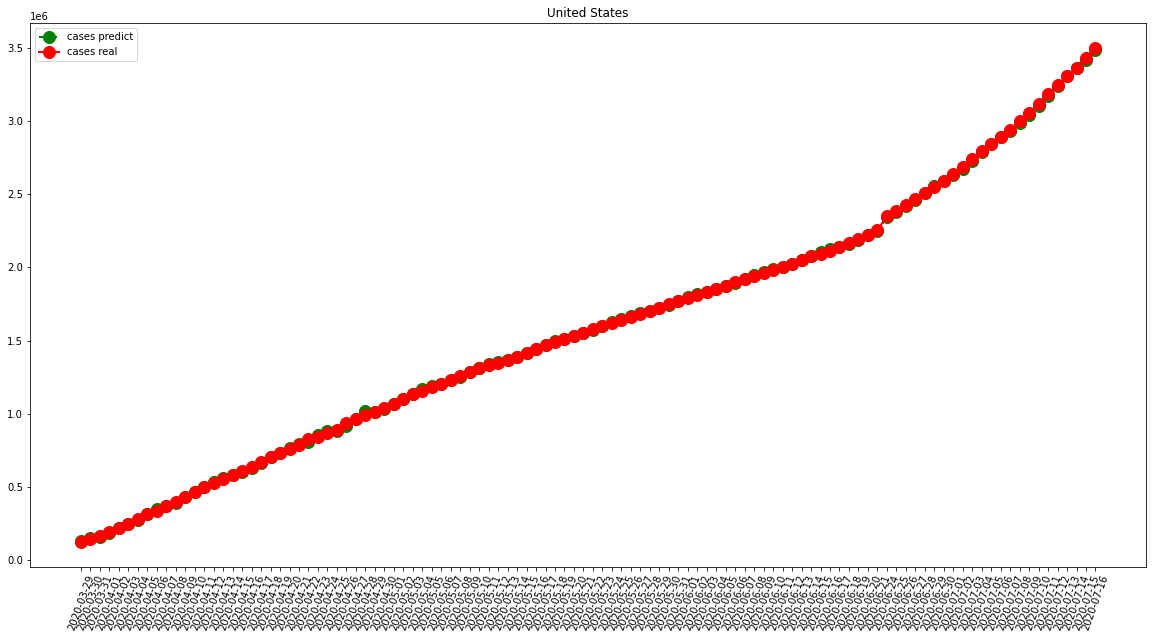

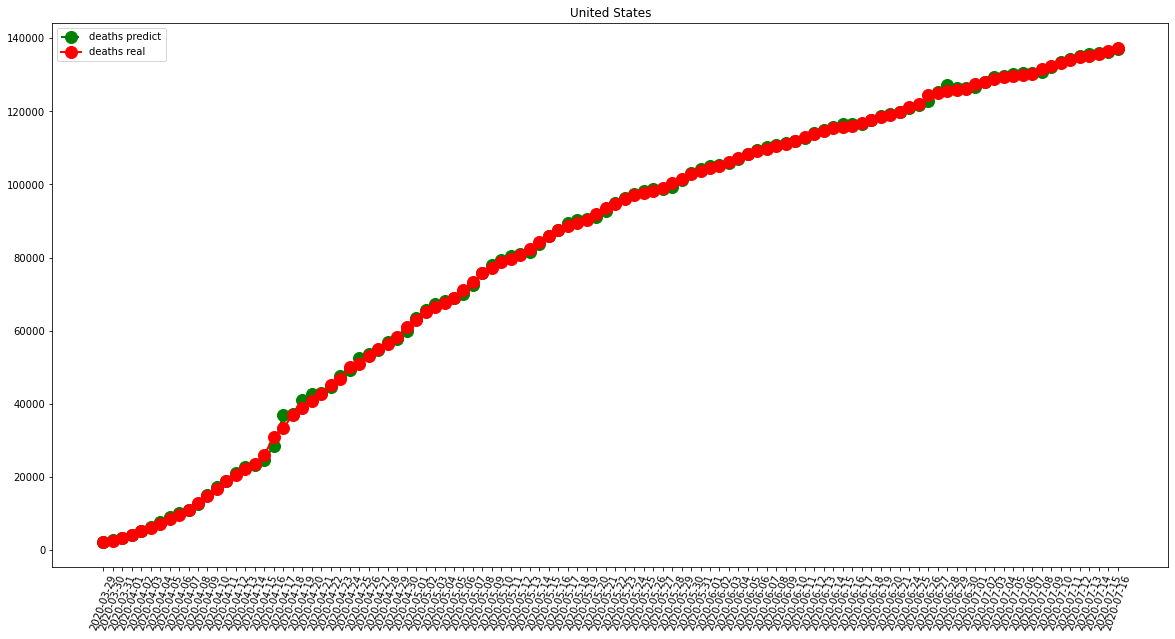

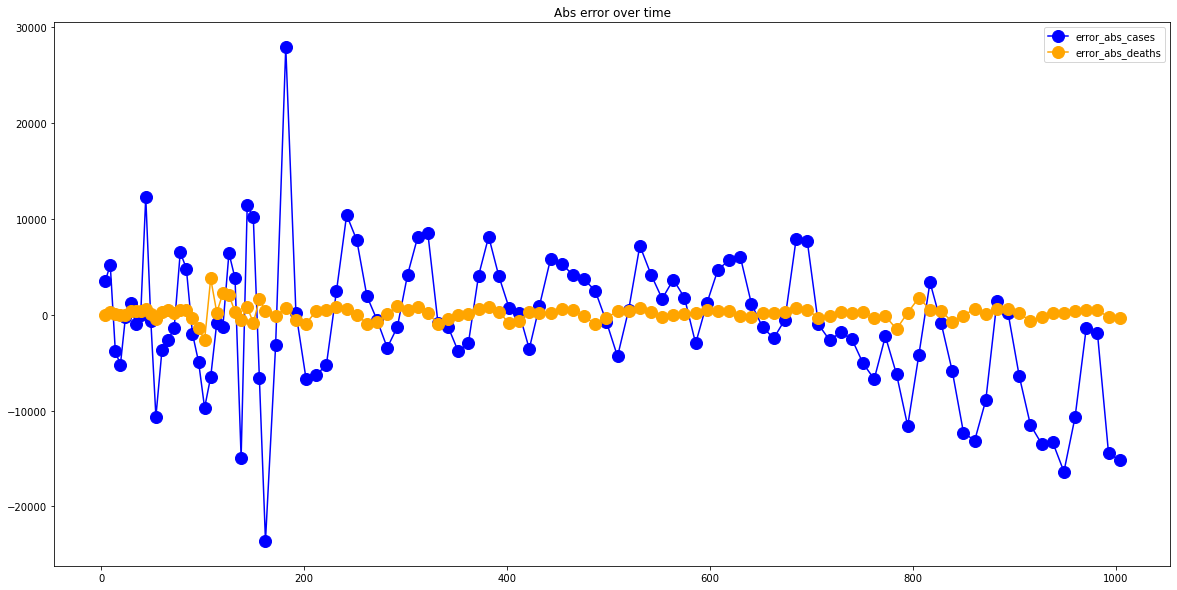

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  84.35185185185185
RMSE =  113.65868332994314
-- China performances for deaths --
MAE =  36.22222222222222
RMSE =  151.0447566733732


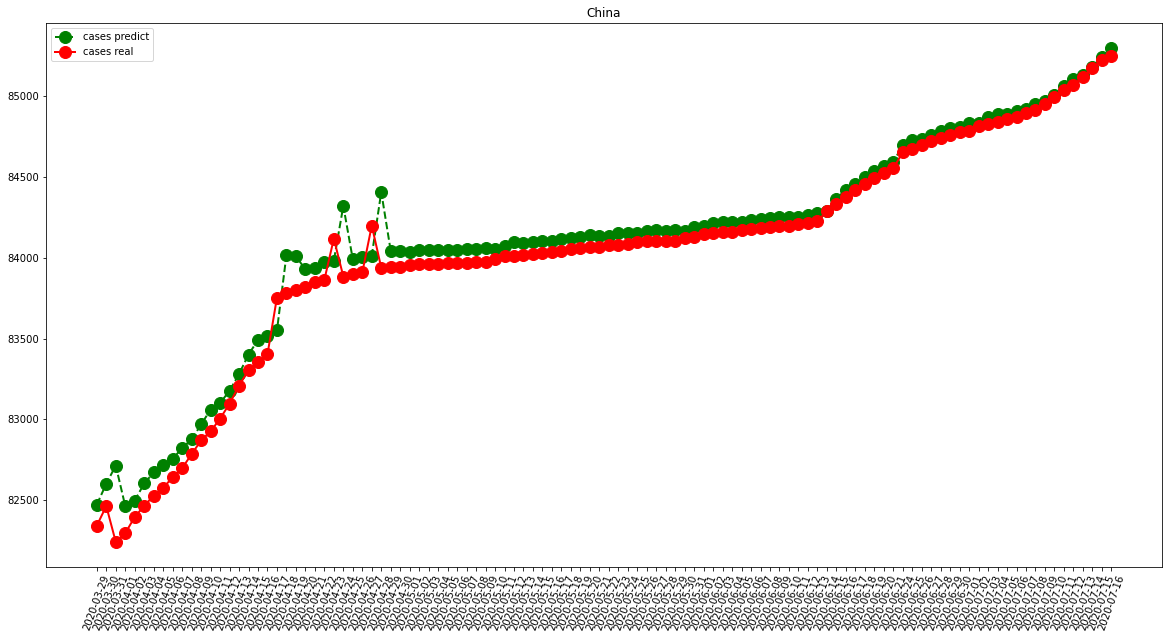

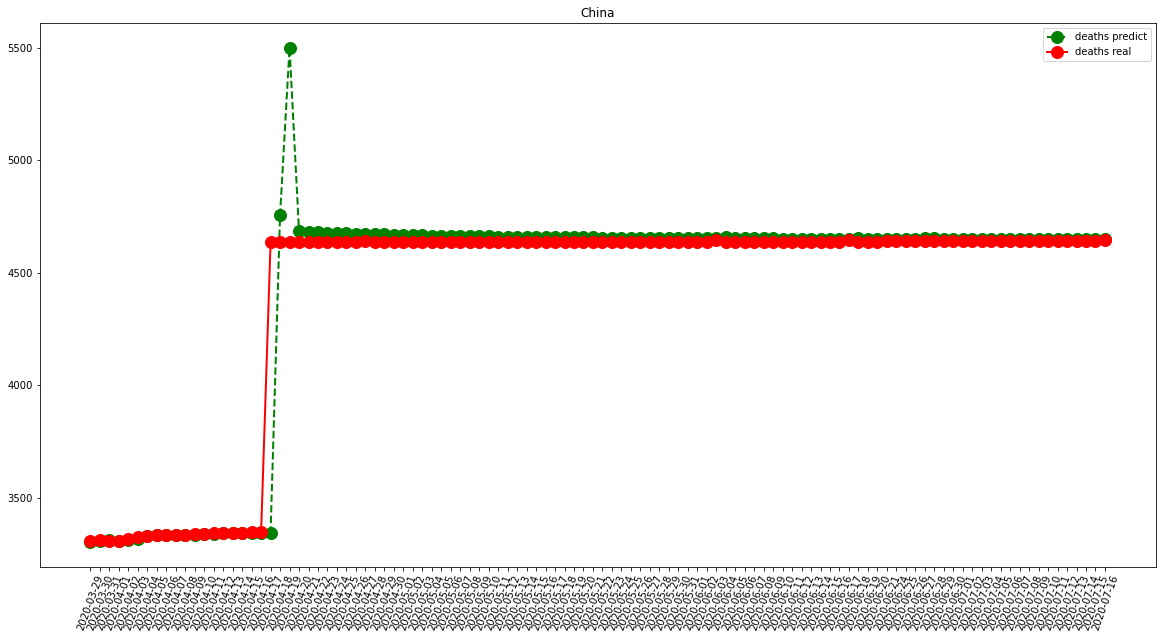

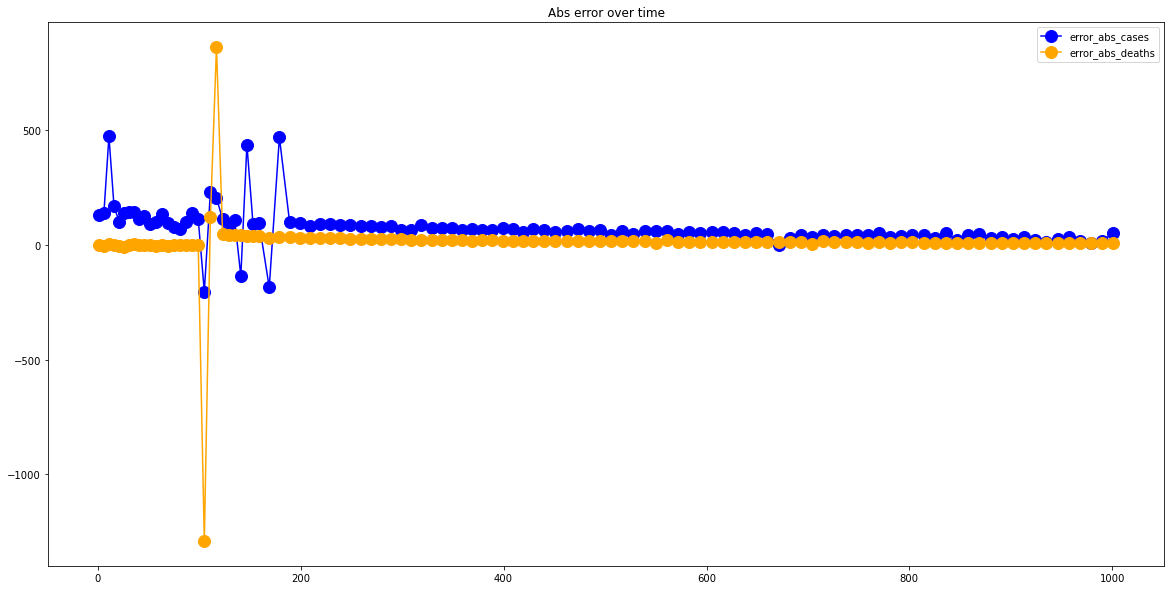

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1472.0125
RMSE =  4663.678147396109
-- United Kingdom performances for deaths --
MAE =  226.9875
RMSE =  547.6089503468693


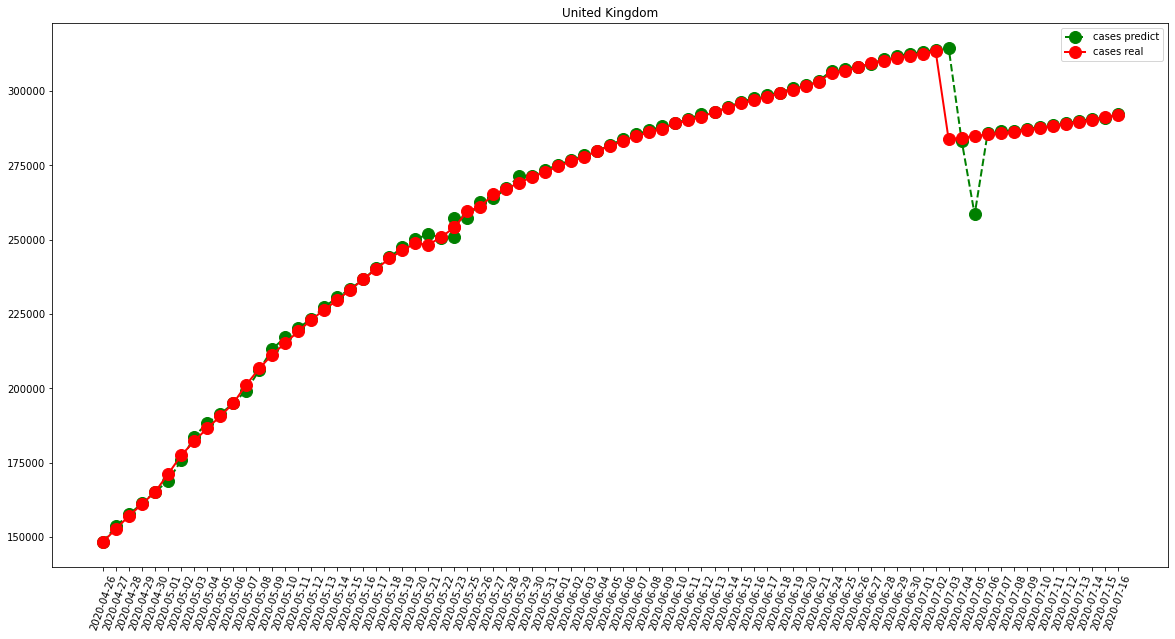

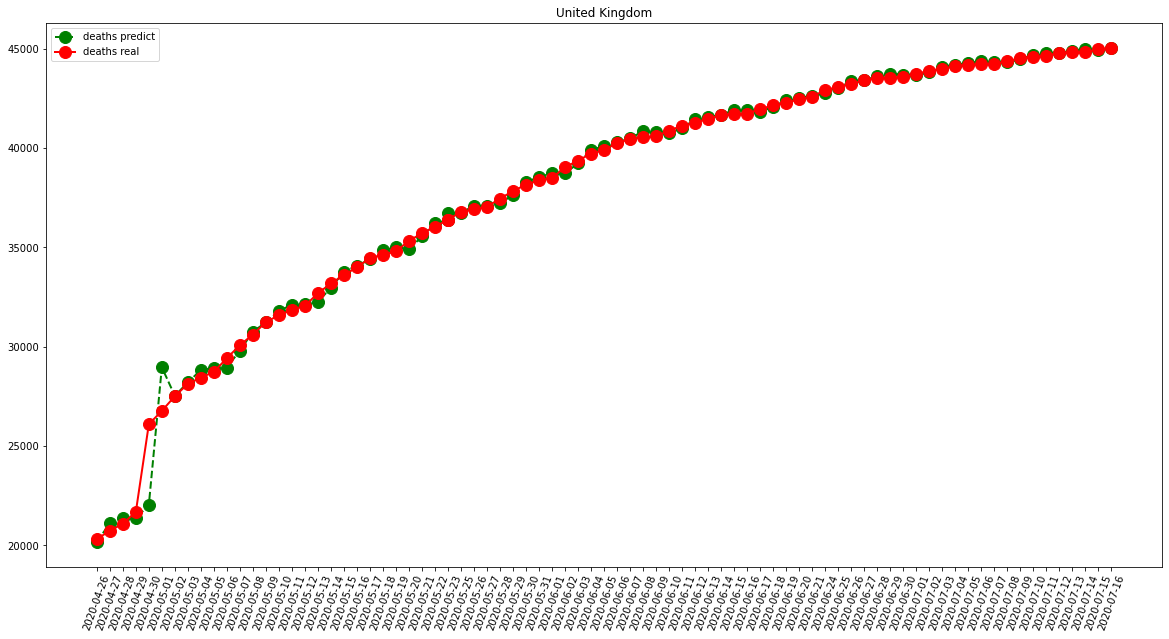

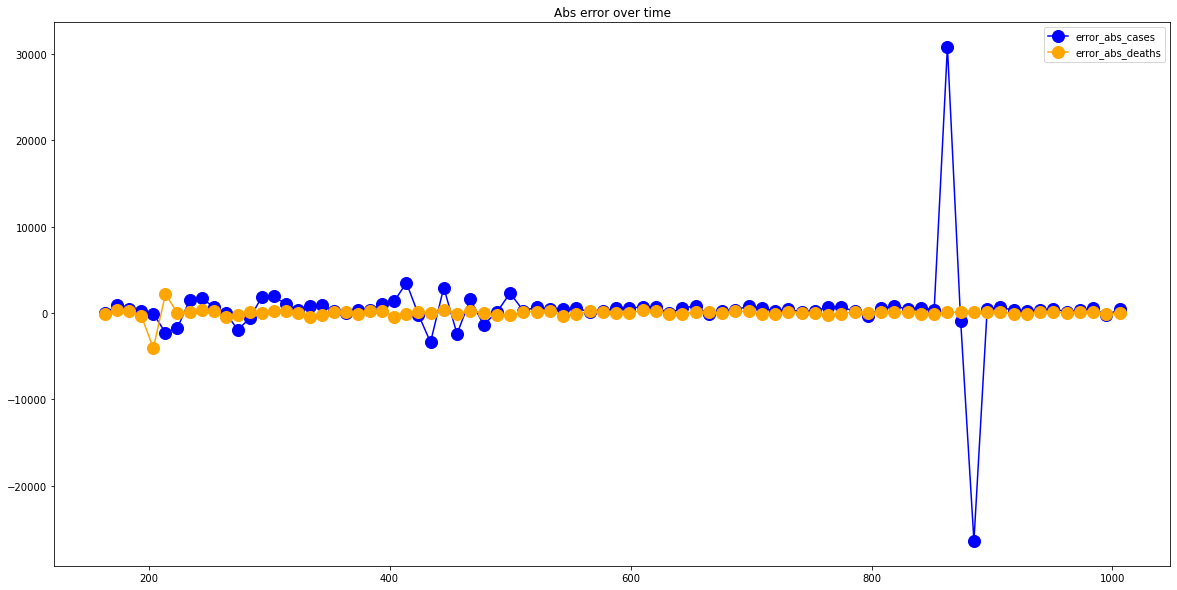

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  301.5875
RMSE =  424.2599291707856
-- Germany performances for deaths --
MAE =  28.7625
RMSE =  48.7202473310635


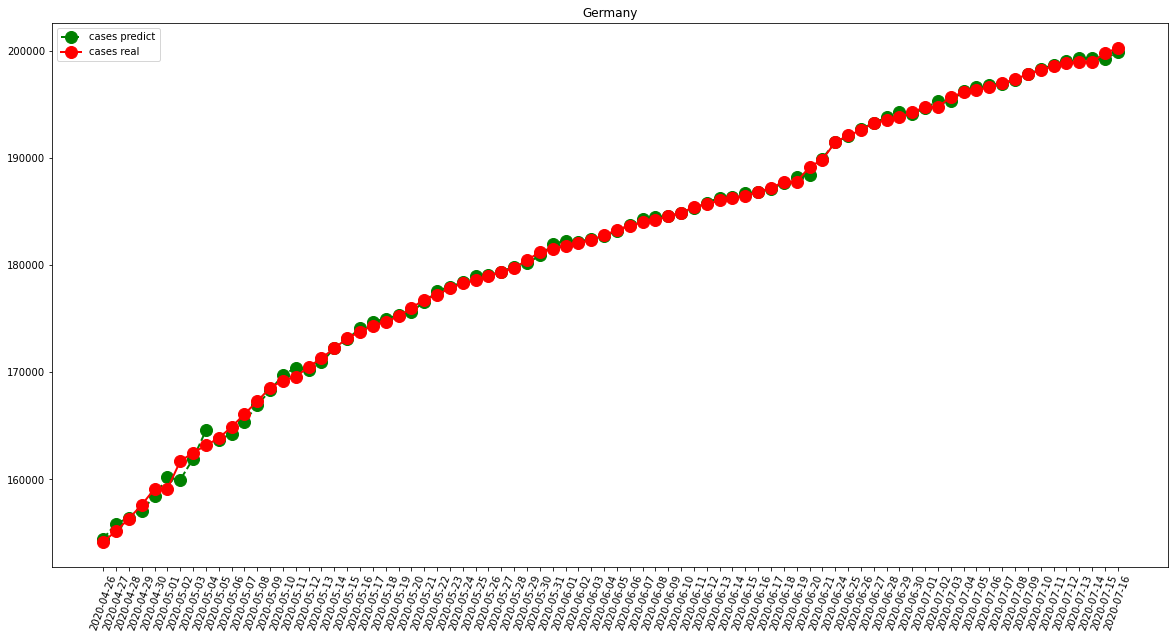

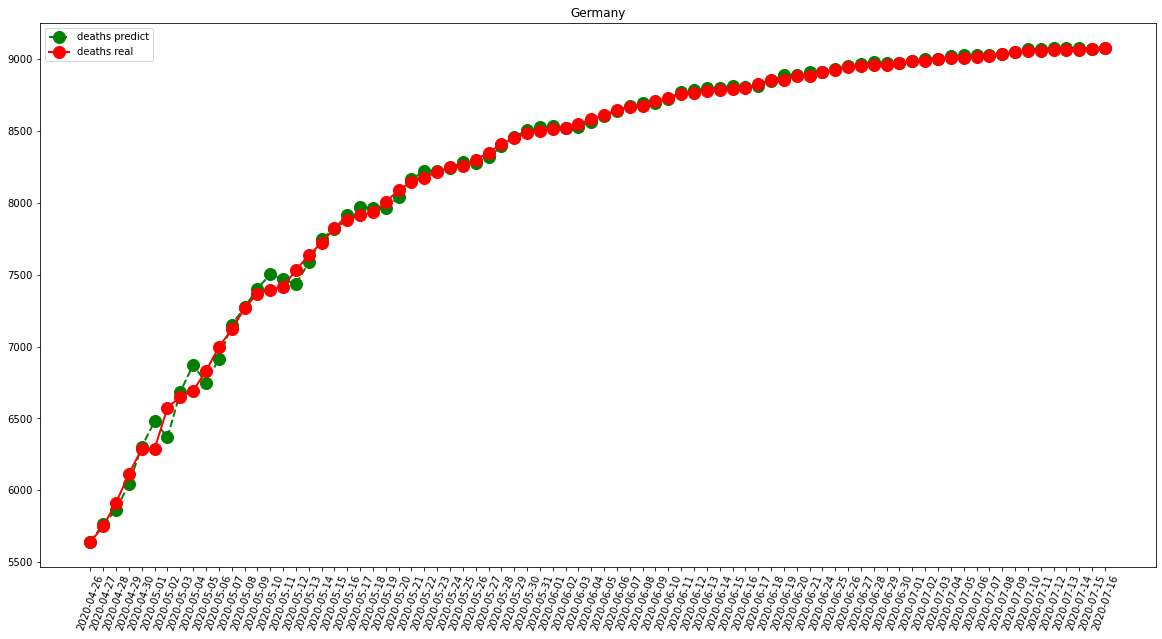

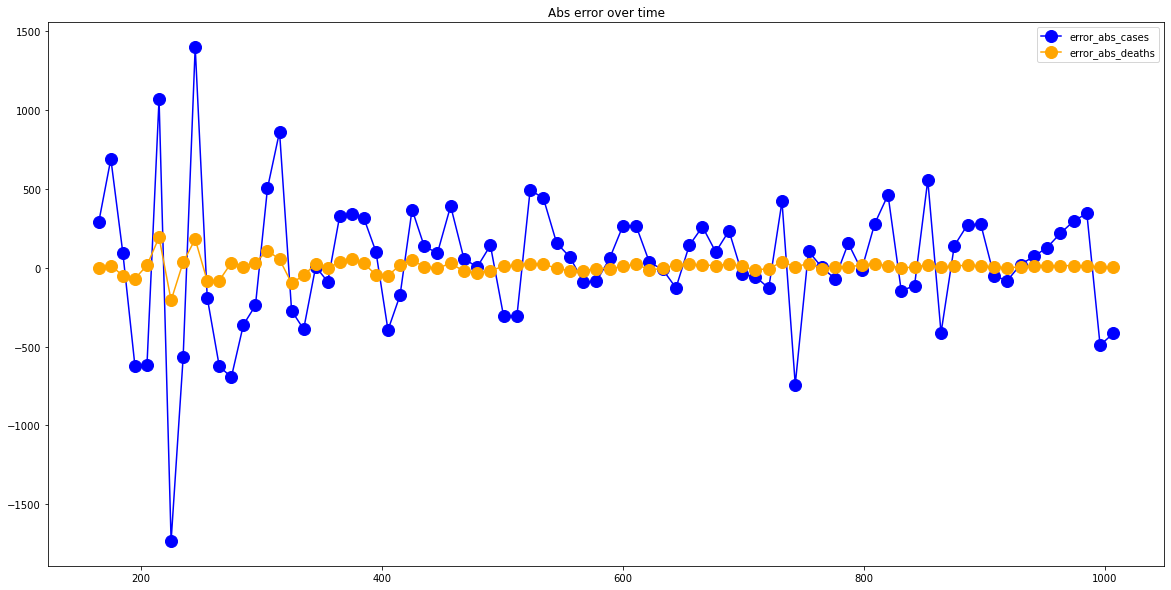

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  364.65
RMSE =  473.3683291053596
-- Iran performances for deaths --
MAE =  18.9625
RMSE =  29.720153095164232


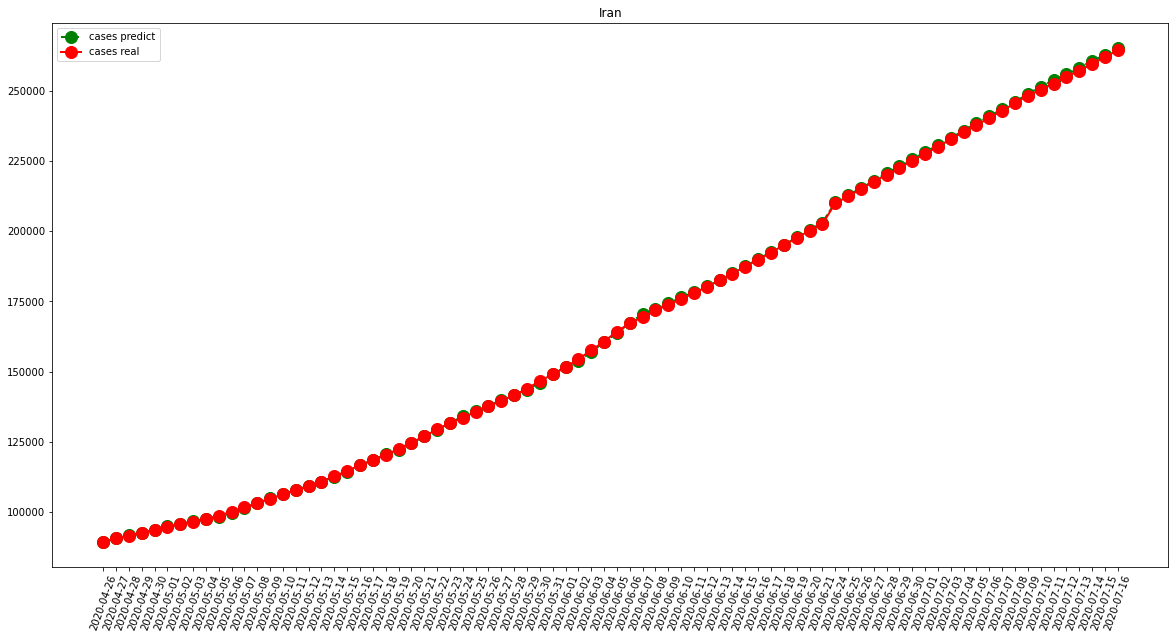

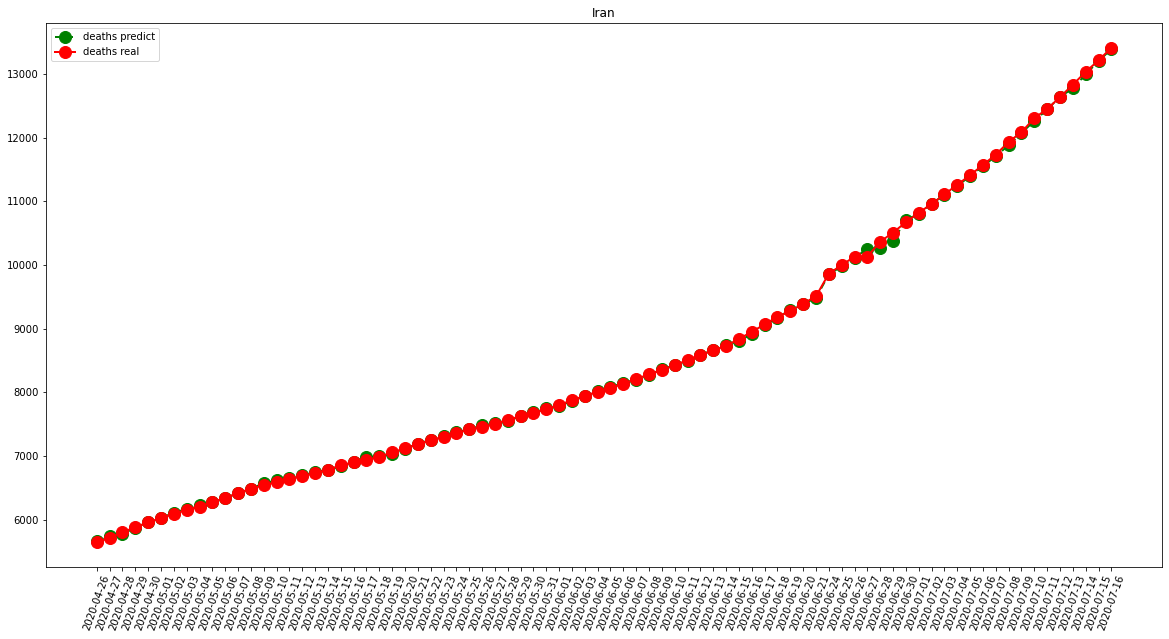

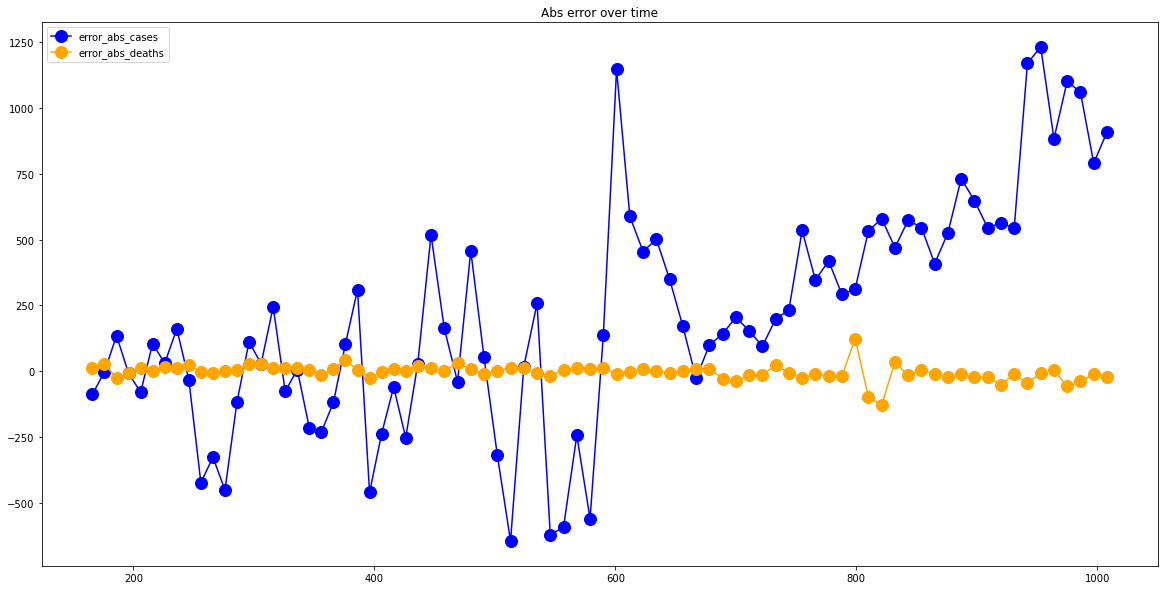

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  235.8125
RMSE =  384.01443657758495
-- Turkey performances for deaths --
MAE =  23.225
RMSE =  113.48689351638805


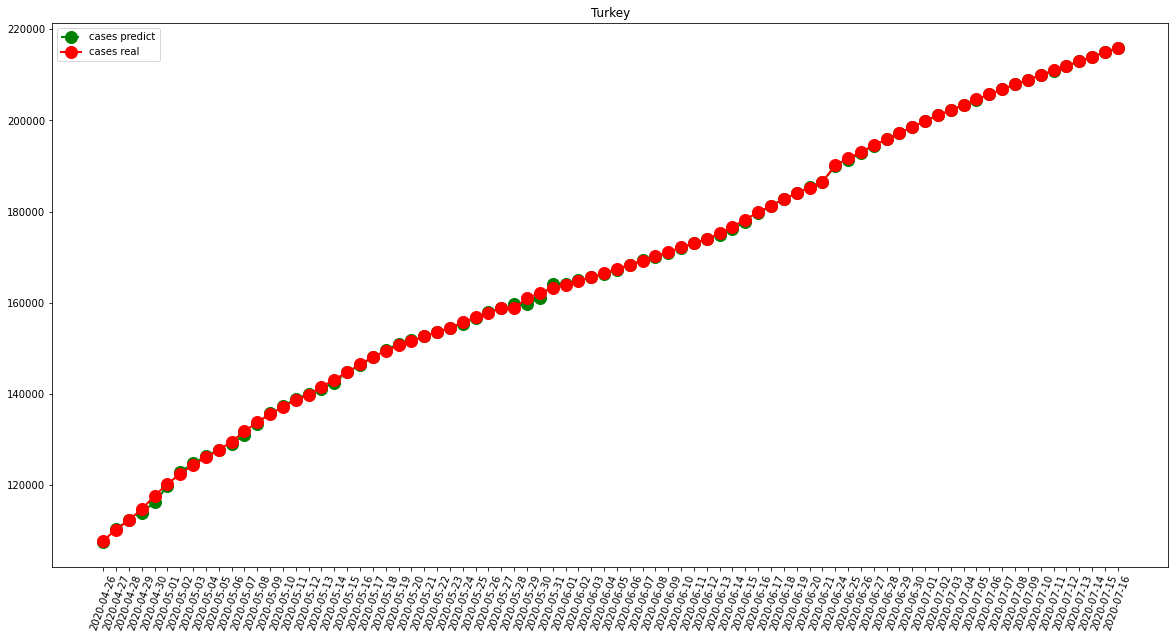

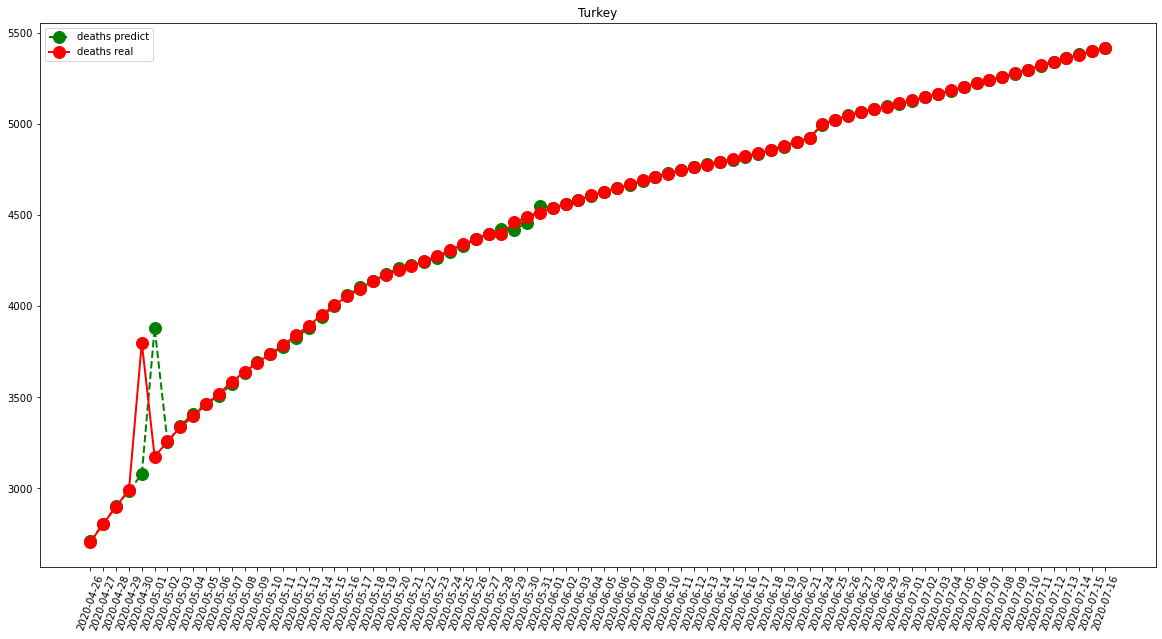

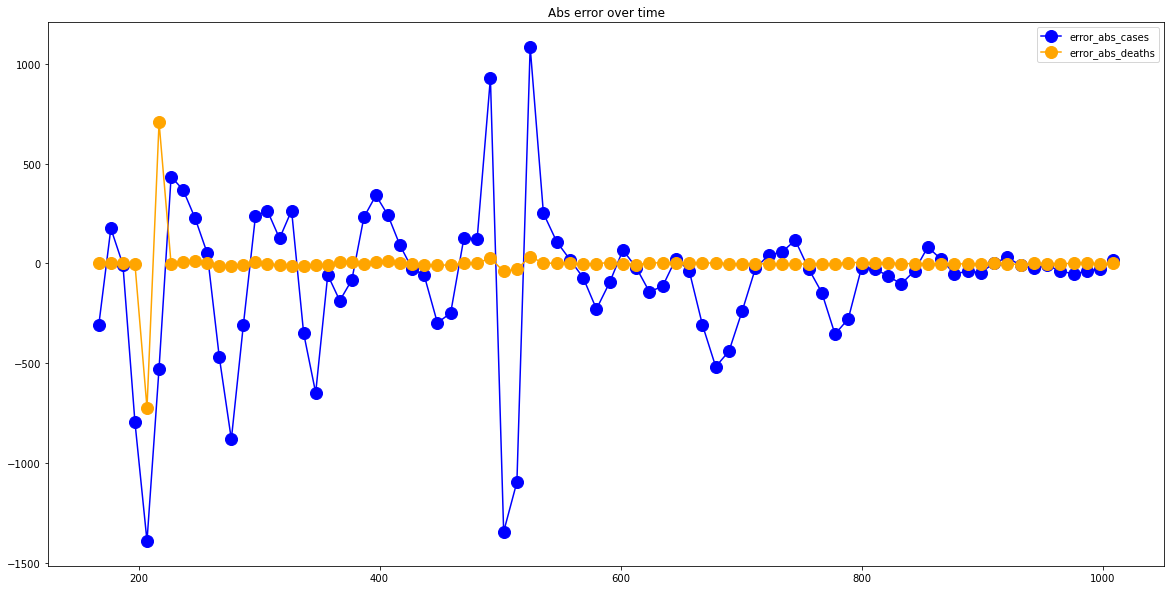

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  9635.471698113208
RMSE =  12743.56912920958
-- Brazil performances for deaths --
MAE =  371.39622641509436
RMSE =  460.1445630102832


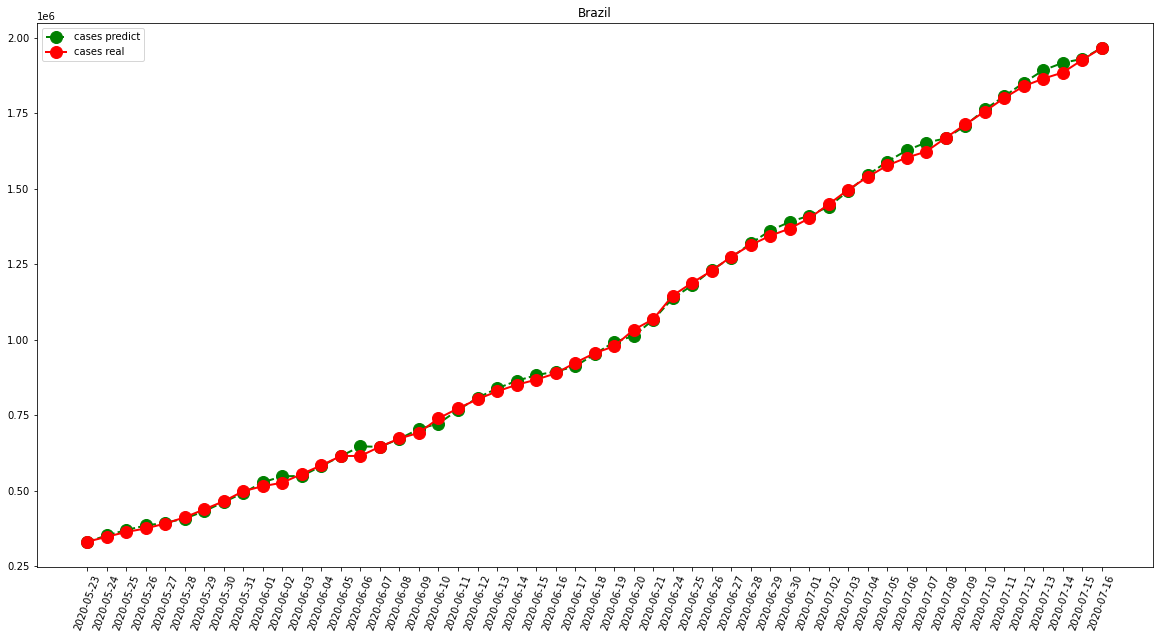

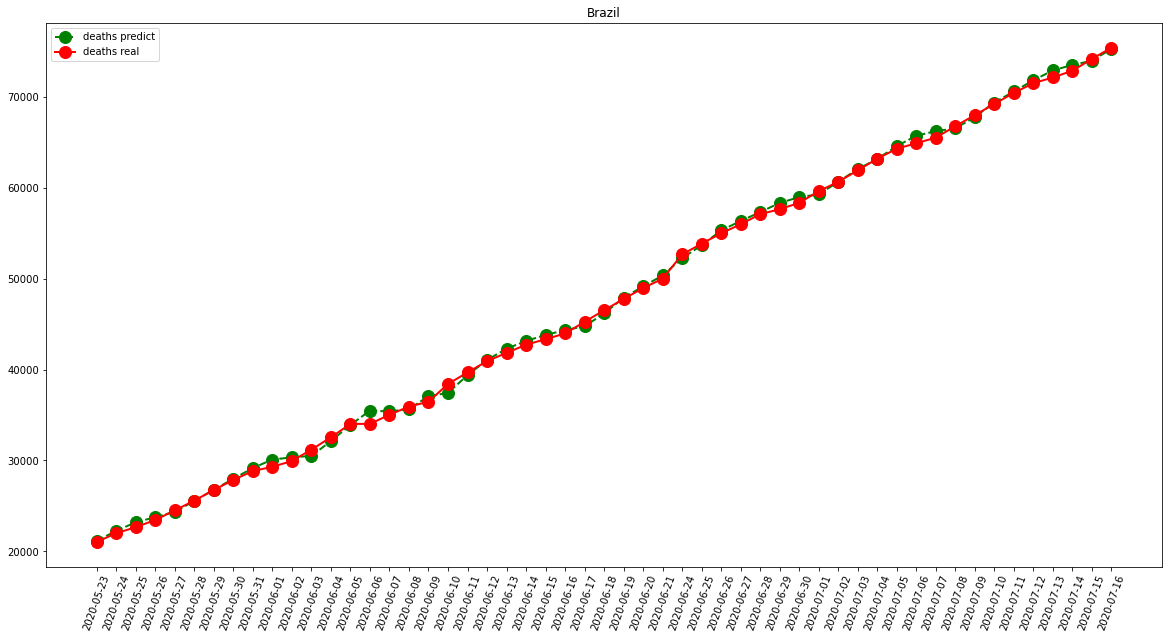

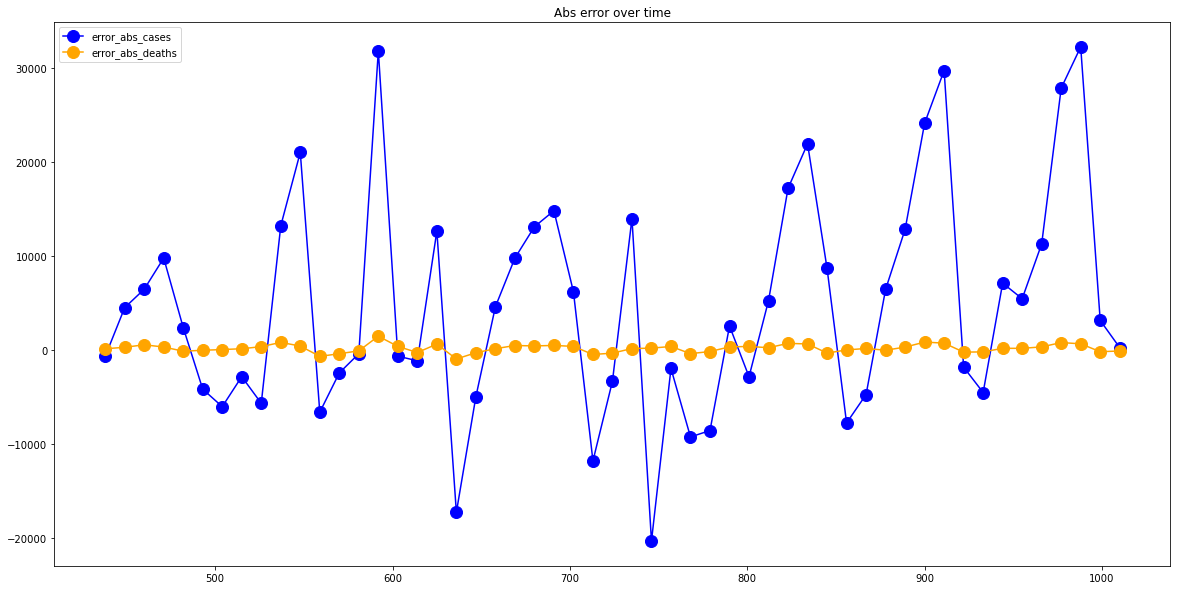

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)